# Feature Detection & Object Detection 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img, title="", cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [3]:
chess = cv2.imread("./img/chess.jpg") 

In [4]:
chess_gray = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)
chess_rgb = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)

In [5]:
chess_gray = cv2.GaussianBlur(chess_gray, (5,5), 0)

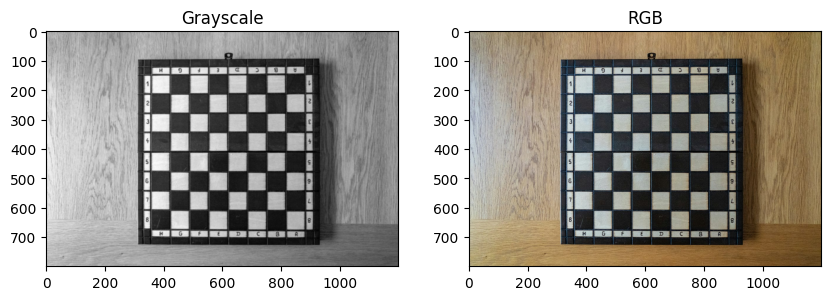

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(chess_gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(122), plt.imshow(chess_rgb), plt.title('RGB')
plt.show()

In [7]:
road = cv2.imread("./img/road.jpeg") 

In [8]:
road_gray = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
road_rgb = cv2.cvtColor(road, cv2.COLOR_BGR2RGB)

In [9]:
road_gray = cv2.GaussianBlur(road_gray, (5,5), 0)

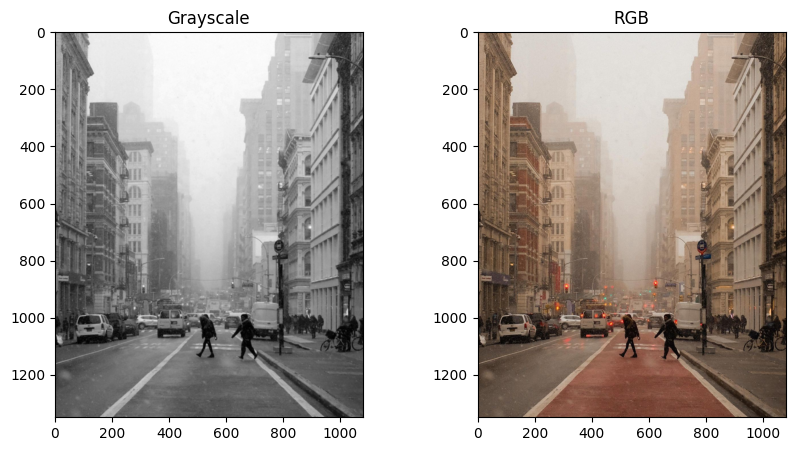

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(road_gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(122), plt.imshow(road_rgb), plt.title('RGB')
plt.show()

Bugün bakmak ile görmek arasındaki farkı öğreneceğiz. Bir görüntünün içindeki "anlamlı" noktaları nasıl buluruz ve bir bilgisayar "Bu bir insan yüzüdür" ya da "Bu bir arabadır" demeyi nasıl öğrenir?

Bilgisayarlar bir görüntüyü bizim gibi bütünsel görmez. Onlar için her şey sayılardan ibaret. Bir görüntüyü tanımlamak için "imza" niteliğindeki benzersiz yapıları/noktaları bulmamız gerekir. Eğer bilgisayar bir görüntüyü sadece piksellerin renk değerleri üzerinden tanımaya çalışsaydı, ışık biraz değiştiğinde veya nesne biraz kaydığında tamamen kör olurdu. İşte bu yüzden feature (öznitelik) tespiti yaparız. Bu da bizi feature detection konusuna getiriyor. 

Bilgisayarlı görüde **“feature”** dediğimiz şeyler:

* kenar
* köşe
* blob

gibi noktalardır.

**Kenarlar (edges)**, bir görüntüdeki parlaklığın veya rengin aniden değiştiği yerlerdir. Kenarlar, bir nesnenin sınırlarını ve şeklini belirler.

**Köşeler (corners)**, iki veya daha fazla kenarın kesiştiği, iki yönde de yoğunluk değişiminin olduğu noktalardır. Köşeler, bilgisayarlı görüde en güvenilir noktalardır. Bir kenar boyunca hareket ettiğinizde hangisinde olduğunuzu anlamak zordur (aperture problem), ancak bir köşe noktası benzersizdir. Görüntü döndürülse veya uzaklaşılsa bile köşe "orada" olmaya devam eder. Bu yüzden iki farklı fotoğrafı birleştirmek (panorama yapmak) için önce köşeler eşleştirilir.

**Blob (leke/bölge)**, çevresindeki piksellerden renk veya doku bakımından belirgin şekilde ayrılan, benzer özelliklere sahip piksel gruplarıdır. Bloblar, nesnelerin ilgi çekici merkezlerini bulmamıza yarar. Örneğin, bir yüzdeki göz bebekleri veya bir ağaçtaki meyveler birer "blob"dur. Şekilden ziyade "orada bir kütle var" bilgisini verirler. Özellikle nesne takibi (object tracking) yaparken bloblar çok işlevseldir.


----

Bilgisayar bu özellikleri bulduktan sonra şu mantığı yürütür:

"Eğer görüntüde yan yana duran iki tane yuvarlak blob (gözler), bunların altında dikey bir kenar (burun) ve en altta yatay bir eğri (ağız) varsa; bu bir insan yüzüdür."

Bu süreç, basit bir matematiksel işlemden karmaşık bir örüntü tanıma (pattern recognition) sürecine giden yolun ilk adımıdır. Günümüzde derin öğrenme (Deep Learning) modelleri bu özellikleri biz söylemeden kendi kendine öğrense de, temelde hepsi bu kenar ve köşe dedektörlerinin devasa katmanlar halinde birleşmesinden oluşur.

----

**Sobel Canny ve Hough Feature Detection değil mi?**

Dün Sobel ve Canny Edge Detection ile Hough Transform algorimalarını gördük. İkisi kenar tespiti Hough'da doğru ve elips, çember gibi geometrik şekilleri buluyordu. 

Yukarıda da kenarları da bir feature olarak bahsettik ama aslında literatüre baktığımızda Canny-Sobel ve Hough Feature Detection algoritmaları arasında yer almıyor. Bu aslında küçük bir terminolojik nüans.

Tabiki kenarda bir bilgi ve özellik **bir feature** ama Feature Detection algoritmalarında algoritmalar sadece blob köşe demiyor burası ayırt edici bir özellik bir keypoint diyorlar. Buldukları herhangi bir noktayı başka bir resimde mevcutsa aynı nokta orada da bulabiliriz. Yani Feature Detection algoritmalarının bulduğu featurelar özellik değil daha net bir türkçe ile **öznitelik**; feature denildiğinde genellikle daha spesifik, tekrarlanabilir ve ayırt edici noktalar kastedilir.

Canny, Sobel ve Hough Transform'un neden klasik anlamda "Feature Detection" (örneğin bir SIFT veya ORB gibi) sınıfına girmediğini şu üç temel başlıkta inceleyebiliriz:

1. **Kenar vs. Nokta (Yerel Ayırt Edicilik)**
Sobel ve Canny Kenar Tespiti (Edge Detection) algoritmalarıdır. Kenarlar, görüntüdeki yoğunluk değişiminin (gradyan) yüksek olduğu yerlerdir.

Sorun: Bir kenar üzerindeki bir noktayı, aynı kenar üzerindeki başka bir noktadan ayırt edemezsiniz. Buna "Aperture Problem" denir.

Feature Detection: Harris Corner, SIFT veya SURF gibi algoritmalar "Keypoints" (anahtar noktalar) veya "Interest Points" (ilgi noktaları) bulur. Bir köşe (corner), her yöne gidildiğinde yoğunluk değişimi gösterdiği için benzersizdir ve takip edilebilir.

2. **Değişmezlik (Invariance) Eksikliği**
Gerçek bir "Feature Detection" algoritmasının en büyük vaadi, görüntüyü döndürseniz, yaklaştırsanız veya ışığı değiştirseniz bile aynı noktayı tekrar bulabilmesidir.

Sobel ve Canny: Sadece o anki piksel gradyanlarına bakar. Görüntüyü biraz büyütürseniz kenar kalınlaşır, döndürürseniz gradyan yönü değişir. Bu algoritmaların bir "tanımlayıcısı" (descriptor) yoktur; yani buldukları şeyi etiketleyip başka bir resimde "Hah, bu o!" diyemezler.

Hough Transform: Bu bir Shape Extraction (Şekil Çıkarma) algoritmasıdır. Canny'den gelen verileri alıp "burada bir çizgi/daire var mı?" diye bakar. Bir özelliği "tespit etmekten" ziyade, mevcut pikselleri geometrik bir modele (y = mx + b gibi) oturtmaya çalışır.

3. **Tanımlayıcı (Descriptor) Faktörü**
Modern öznitelik tespiti iki aşamalıdır: Detect (Bul) ve Describe (Tanımla).

Canny/Sobel: Sadece "burada bir değişim var" der ve orada durur. Elinizde sadece bir ikili (binary) harita kalır.

Hough: "Burada bir doğru var" der ve doğrunun denklemini verir.

Gerçek Feature Algoritmaları: Bir noktayı bulur (Detection) ve sonra o noktanın çevresindeki pikselleri matematiksel bir özet haline getirir (Description). Bu özet (vektör) sayesinde iki farklı fotoğraftaki aynı objeyi eşleştirebilirsiniz. Canny ile iki farklı fotoğraftaki "aynı kenarı" matematiksel olarak eşleştirmek çok zordur.

| Algoritma            | Çıktı Tipi             | Seviye        | Temel Amaç                                                  |
|----------------------|------------------------|---------------|-------------------------------------------------------------|
| Sobel / Canny        | Piksel Haritası        | Düşük Seviye  | Yoğunluk değişimlerini (kenarları) bulmak.                  |
| Hough Transform      | Geometrik Parametre    | Orta Seviye   | Kenar piksellerini gruplayıp şekil oluşturmak.              |
| SIFT / ORB / Harris  | Keypoint + Descriptor  | Yüksek Seviye | Nesne tanıma ve eşleştirme için benzersiz noktalar bulmak.   |



Eğer "feature" kelimesini en geniş anlamıyla (görüntüdeki anlamlı her türlü veri) kullanırsanız, Canny bir feature detector'dır. Ancak bir CV mühendisiyle konuşuyorsanız, o "feature" dediğinde büyük ihtimalle eşleştirilebilir ve ayırt edici noktaları kastediyordur.


## 1. Feature Detection

Feature detection algoritmaları,

**Köşe (Corner) Tabanlı Yöntemler**

* Harris Corner Detector
    * En klasik yöntemdir.
    * Gradient matrisine dayanır.
    * Dönmeye dayanıklıdır, ölçeğe dayanıklı değildir.
    * Bir kenarın (edge) aksine, bir köşeyi $x$ ve $y$ düzleminde tam olarak konumlandırabilirsin.

* Shi–Tomasi (Good Features to Track)
    * Harris’in iyileştirilmiş hâlidir.
    * Takip için daha stabildir.
    * KLT Tracker ile birlikte kullanılır.

* FAST (Features from Accelerated Segment Test)
    * Çok hızlıdır.
    * Gerçek zamanlı uygulamalarda tercih edilir.


Bu algoritmalar sadece noktayı bulur. O noktanın neye benzediğini anlatan bir "kimlik kartı" (descriptor) çıkarmazlar. Ayrıca görüntüyü büyütürsen (scale), köşe özelliğini kaybedip düz bir çizgiye dönüşebilir.
   

**Blob (Bölge) Tabanlı Yöntemler**

Nokta değil, “bölge” tespit ederler.

* LoG (Laplacian of Gaussian)
    * Ölçek uzayında blob bulur.
    * Yavaştır.
    * SIFT'in temeli.

* DoG (Difference of Gaussian)
    * LoG’un hızlı versiyonu.
    * SIFT’in temelidir.

* MSER (Maximally Stable Extremal Regions)
    * Kontrast tabanlı stabil bölgeler bulur.
    * OCR ve metin tespitinde çok kullanılır.

**SIFT Ailesi (Scale-Invariant Methods)**

Bunlar modern feature extraction’ın temelini oluşturur. Panorama, matching, 3D reconstruction gibi alanlardan kullanılırlar.Buraya kadar Feature Detection algoritmaları sadece bir **detector** idi artık **descriptor**lerde karşımıza çıkmaya başladı.

* SIFT (Scale-Invariant Feature Transform)
    * Ölçek ve dönüşe dayanıklıdır.
    * Çok stabildir.
    * Yavaştır.
    * **Feature detection'ı zirve noktalarıydı**

* SURF (Speeded-Up Robust Features)
    * SIFT’ten hızlıdır.

* KAZE / AKAZE
    * Nonlinear scale space kullanır.
    * SIFT’e alternatif modern yöntemdir.

**Binary Descriptor Tabanlı Yöntemler**

Hız odaklı modern yöntemlerdir. Gerçek zamanlı sistemler, robotik alanlarda kullanılır.

* ORB (Oriented FAST + BRIEF)
    * FAST + BRIEF birleşimi
    * Çok hızlı
    * Mobil sistemlerde yaygın

* BRIEF
    * Sadece descriptor üretir
    * FAST ile birlikte kullanılır

* BRISK
    * Ölçekli binary descriptor

* FREAK
    * Retina benzeri sampling

**Histogram / Gradient Tabanlı Yöntemler**

Bunlar daha çok “region feature” çıkarır. Yüz tanıma, tekstür sınıflandırma gibi alanlarda kullanılır.

* HOG (Histogram of Oriented Gradients)
    * İnsan tespitinde klasik yöntemdir.
    * **CNN öncesi dönemin yıldızıydı.**

* LBP (Local Binary Pattern)
    * Doku analizi için kullanılır.

**Marker Tabanlı Feature Sistemleri** : Pose estimation, AR, robotics alanları için.

* ArUco Markers
* AprilTag

<br><br>
Ve daha da ileride Deep Learning tabanlı sistemler.

### Harris Corner Detection

**Bir pencereyi/kernel görüntü üzerinde kaydırdığımızda ne kadarlık bir değişim görüyoruz?**

Bir görüntü üzerinde çok küçük bir pencereniz olduğunu hayal edin. Bu pencereyi her yöne (sağa, sola, yukarı, aşağı) çok az miktar kaydırdığınızda, pencere içindeki piksellerin yoğunluğu (renk şiddeti) nasıl değişiyor?

Düz Alan (Flat Region): Pencereyi hangi yöne kaydırırsanız kaydırın, içerideki yoğunluk neredeyse hiç değişmez. (Örn: Beyaz bir duvarın ortası).

Kenar (Edge): Pencereyi kenara paralel kaydırırsanız değişim olmaz, ancak kenara dik yönde kaydırırsanız büyük bir değişim olur. (Örn: Bir masanın kenar çizgisi).

Köşe (Corner): Pencereyi hangi yöne kaydırırsanız kaydırın, yoğunlukta çok büyük bir değişim meydana gelir. İşte "köşe" dediğimiz şey tam olarak budur!


Harris Corner Detection, görüntü döndürüldüğünde bile (rotation invariant) köşeleri bulmaya devam eder. Köşe her yönden köşedir! Ancak, görüntü ölçeklendiğinde (bir nesneye çok yaklaştığınızda veya uzaklaştığınızda) aynı performansı gösteremeyebilir; bu noktada devreye SIFT gibi daha gelişmiş algoritmalara ihtiyaç duyarız.

Bir $M$ matrisi oluşturuluyor. Bizim bu $M$ matrisinin iki tane özdeğeri var. ($\lambda_1$ ve $\lambda_2$). Bu özdeğerler bize değişimin miktarını söyler.

* $\lambda_1$ ve $\lambda_2$ ikisi de küçükse: Burası düz bir alandır.
* Biri çok büyük, diğeri küçükse: Burası bir kenardır.
* İkisi de büyükse: Tebrikler, bir köşe buldunuz!

Özdeğerleri tek tek hesaplamak bilgisayarı yorar. Harris, bunun yerine çok daha hızlı hesaplanan bir "Köşe Yanıt Skoru" ($R$) önermiştir. 
* $|R|$ küçükse: Bölge düzdür.
* $R < 0$ ise: Bölge bir kenardır.
* $R$ büyükse: Bölge bir köşedir.

In [11]:
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

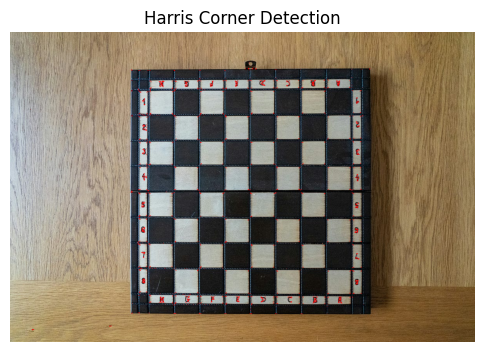

In [12]:
# Harris Corner Detection

blockSize = 2 # pencere boyutu, her piksel için kaç × kaç komşuluk alanda gradyan hesaplanacak? blockSize X blockSize

apertureSize = 5 # türevleri hesaplarken kullanılan Sobel çekirdeğinin boyutudur.

k = 0.04  # formüldeki k, köşe, kenar, düz alan ayrımını ayarlayan parametre


dst = cv2.cornerHarris(np.float32(chess_gray), blockSize=blockSize, ksize=apertureSize, k=k)
img_harris = chess_rgb.copy()# cv2.cvtColor(chess_gray, cv2.COLOR_GRAY2BGR)
img_harris[dst > 0.01 * dst.max()] = [255, 0, 0] # Maksimum Harris skorunun %1’inden büyük olanları köşe say ve buraları kırmızı yap

show(img_harris, "Harris Corner Detection")

### Shi-Thomasi Corner Detection

Harris'den 6 yıl sonra **"Good Features to Track"** makalesiyle ortaya çıkan yöntem aslında Harris algoritması üzerine yapılmış çok küçük ama çok etkili bir modifikasyondur.

Algoritma mütevazı olmayı pek sevmiyor; direkt "Takip Etmeye Değer İyi Öznitelikler" diyor.

**Nasıl Çalışır?**

* $M$ Matrisini Kur: Tıpkı Harris'te olduğu gibi görüntünün türevlerini ($I_x, I_y$) alarak yapısal tensörü oluşturur.
* Özdeğerleri Hesapla: $\lambda_1$ ve $\lambda_2$ özdeğerlerini bulur.
* Kritik Karar: Eğer her iki özdeğer de belirlenen bir eşik değerin ($\lambda_{min}$) üzerindeyse, orayı köşe olarak işaretler.

Peki bu neden daha iyi? 
* $k$ Katsayısından Kurtuluruz: Harris'teki o can sıkıcı $0.04 - 0.06$ arası değişen ampirik $k$ parametresine ihtiyacımız kalmaz.
* Daha Doğru Sonuçlar: Özellikle nesne takibi (object tracking) yaparken, Shi-Tomasi'nin seçtiği köşelerin zaman içindeki değişimlere (ışık, açı vb.) karşı daha dayanıklı olduğu kanıtlanmıştır.


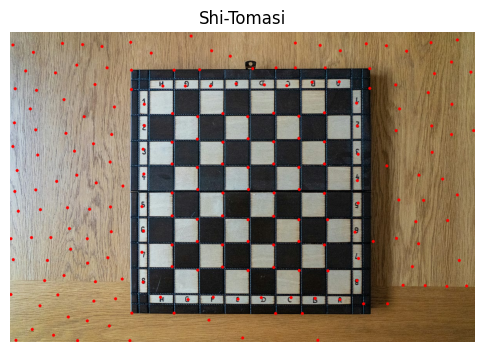

In [13]:
corners = cv2.goodFeaturesToTrack(
    chess_gray,
    maxCorners=500,  # kalite kontrol mekanizması da sunuyor
    qualityLevel=0.01, # max(score)’un yüzde kaçı kabul edilecek? Harris'deki 0.01 * dst.max()
    minDistance=50, # İki köşe arası minimum mesafe (pixel), aynı bölgeye yığılmayı önler
    blockSize=3, # Harris’teki blockSize ile aynı mantık.
    useHarrisDetector=False
)

img_st = chess_rgb.copy()

if corners is not None:
    corners = np.int32(corners)

    for c in corners:
        x, y = c.ravel()
        cv2.circle(img_st, (x, y), 4, (255, 0, 0), -1)

show(img_st, "Shi-Tomasi")


### ORB (Oriented FAST and Rotated BRIEF)

ORB, sahnedeki “ayırt edici lokal detayları” bulur. Yani insan, araba, bina “nesne” olarak değil; onların üzerindeki köşeleri, köşe-benzeri dokuları ve kontrastlı bölgeleri işaretler.

Bir object detector değil, hala feature detection yapıyoruz. Yani insan, araba bulmaz sadece nerelerden yoğun feature çıkar bunu bulur. 

ORB köşe benzeri dokuları yakalar. Ürettiği keypointler,
* Aynı sahnenin başka açıdan fotoğrafıyla eşleştirme
* Panorama oluşturma
* Kamera takibi gibi uygulamalarda kullanılır.

ORB iki ayrı işi beraber yapar,
* Neresi önemli? (detector)
* Bu nokta nasıl görünüyor? (descriptor)

Detector feature olabilecek noktaları tespit eder (FAST). Descriptor (BRIEF), bir noktanın etrafındaki küçük görüntü parçasını sayılara çevirir. Başka bir resimde aynı köşe varsa, çevresi de buna benzer olur. Bu şekilde realtime bir görüntü de ya da panaroma stichingde corner-tracking yapılabilir.

Harris/FAST (Sadece Detector): "Koordinat (120, 450)'de bir köşe var."

SIFT/SURF/ORB (Detector + Descriptor): "Koordinat (120, 450)'de bir köşe var VE bu köşenin çevresindeki piksellerin yönelimi, gradyanı şu matematiksel vektöre (kimlik kartına) sahip."

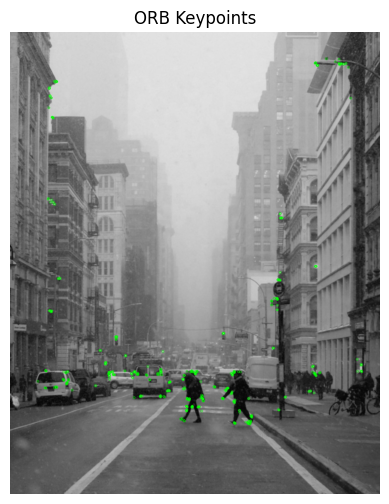

In [14]:
# ORB (Oriented FAST and Rotated BRIEF)

orb = cv2.ORB_create()
# default olarak FAST detector, BRIEF descriptor, Rotation invariant ve ~500 keypoint ile oluşturulur

kp = orb.detect(road_gray, None) # konum + ölçek + yön bilgisi ( (x, y), size, angle, response)

kp, des = orb.compute(road_gray, kp)

img_orb = cv2.drawKeypoints(road_gray, kp, None, color=(0,255,0), flags=0)
show(img_orb, "ORB Keypoints")


### Template Matching with SIFT (Scale-Invariant Feature Transform)

SIFT'i özel kılan şey "değişmezlik" (invariance) ilkesidir. Bir nesneyi;
* Ölçek değişse bile (yakınlaşma/uzaklaşma),
* Döndürülse bile (rotasyon),
* Işık değişse bile (aydınlık/karanlık), tanıyabilmesidir.

**SIFT Nasıl Çalışır?** 
1. Ölçek Uzayında Ekstremum Tespiti (DoG)
Bir nesnenin bir köşesi, ona çok yaklaştığınızda "köşe" olmaktan çıkıp düz bir çizgi gibi görünebilir. SIFT bunu aşmak için görüntüyü farklı seviyelerde bulanıklaştırır ve boyutunu küçültür (piramit yapısı). Ardından bu katmanlar arasındaki farkları alır (Difference of Gaussians - DoG). Her ölçekte "hayatta kalan" noktalar, bizim potansiyel anahtar noktalarımızdır.

2. Anahtar Nokta Belirleme (Keypoint Localization)
Tüm aday noktalar iyi değildir. SIFT, düşük kontrastlı noktaları ve kenar üzerindeki kararsız noktaları eler. Geriye sadece en sağlam, en "karakteristik" noktalar kalır.

3. Oryantasyon Atama (Rotation Invariance)
Her anahtar noktaya, etrafındaki piksellerin baskın gradyan yönüne göre bir "yön" verilir. Bu sayede, görüntü 90 derece dönse bile SIFT noktası "Benim kuzeyim hala burası" diyebilir. Dönüşlere karşı bağışıklık tam olarak burada kazanılır.

4. Anahtar Nokta Tanımlayıcı (Descriptor Generation)
Burası en can alıcı nokta. Her anahtar noktanın etrafındaki 16x16'lık bölgeye bakılır ve bu bölge 128 sayılık bir vektöre dönüştürülür. Bu 128 sayı, o noktanın "kimlik kartıdır". Artık iki farklı fotoğraftaki noktaları karşılaştırırken piksellere değil, bu kimlik kartlarındaki sayılara bakıyoruz.

**Fun Fact**

Patent Meselesi: SIFT uzun yıllar boyunca David Lowe ve British Columbia Üniversitesi adına patentliydi. Bu yüzden ticari projelerde kullanımı kısıtlıydı. Mart 2020 itibarıyla patent süresi doldu ve artık tamamen özgür!

İnsan Beyniyle Benzerlik: SIFT'in çalışma mantığı, insan beynindeki görsel korteksteki (V1 bölgesi) nöronların nesneleri tanımlama biçimiyle şaşırtıcı derecede benzerlik gösterir.

Hız: SIFT çok güçlüdür ama Harris veya ORB kadar hızlı değildir. Her karede binlerce 128 boyutlu vektör hesaplamak işlemciyi biraz terletebilir.

In [ ]:
# Template bolgesi (y1:y2, x1:x2)
template_gray = chess_gray[150:330, 250:430]

h_s, w_s = chess_gray.shape
M = cv2.getRotationMatrix2D((w_s // 2, h_s // 2), 8, 1.0)
scene_rot_gray = cv2.warpAffine(chess_gray, M, (w_s, h_s))
scene_rot_bgr = cv2.cvtColor(scene_rot_gray, cv2.COLOR_GRAY2BGR)

In [ ]:
sift = cv2.SIFT_create(nfeatures=3000)

kp_t, des_t = sift.detectAndCompute(template_gray, None)
kp_s, des_s = sift.detectAndCompute(scene_rot_gray, None)

Toplam eslesme: 138 | Iyi eslesme: 68


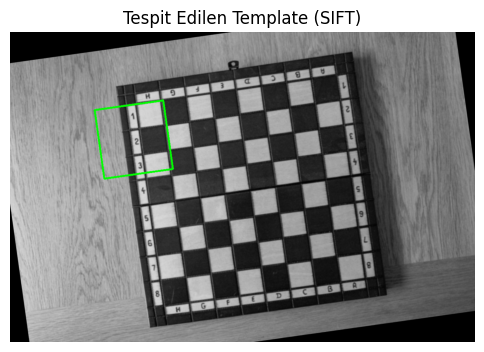

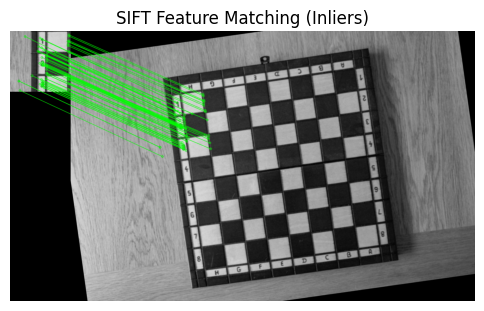

In [ ]:
if des_t is None or des_s is None:
    print("Yeterli SIFT descriptor uretilemedi.")

else:

    # SIFT -> L2 norm
    bf = cv2.BFMatcher(cv2.NORM_L2)

    knn_matches = bf.knnMatch(des_t, des_s, k=2)

    # Lowe Ratio Test
    good = []
    for m, n in knn_matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    print(f"Toplam eslesme: {len(knn_matches)} | Iyi eslesme: {len(good)}")


    if len(good) >= 10:

        src_pts = np.float32(
            [kp_t[m.queryIdx].pt for m in good]
        ).reshape(-1, 1, 2)

        dst_pts = np.float32(
            [kp_s[m.trainIdx].pt for m in good]
        ).reshape(-1, 1, 2)


        # Homography (RANSAC)
        H, mask = cv2.findHomography(
            src_pts,
            dst_pts,
            cv2.RANSAC,
            5.0
        )


        if H is not None:

            h_t, w_t = template_gray.shape

            corners = np.float32([
                [0, 0],
                [w_t - 1, 0],
                [w_t - 1, h_t - 1],
                [0, h_t - 1]
            ]).reshape(-1, 1, 2)


            projected = cv2.perspectiveTransform(corners, H)

            # Template sinirlarini ciz
            cv2.polylines(
                scene_rot_bgr,
                [np.int32(projected)],
                True,
                (0, 255, 0),
                3
            )


            # Inlier matchleri ciz
            selected_matches = good[:80]

            inlier_mask = mask.ravel().tolist() if mask is not None else None

            if inlier_mask is not None:
                inlier_mask = inlier_mask[:len(selected_matches)]


            img_match = cv2.drawMatches(
                template_gray, kp_t,
                scene_rot_gray, kp_s,
                selected_matches,
                None,
                matchColor=(0, 255, 0),
                singlePointColor=(255, 0, 0),
                matchesMask=inlier_mask,
                flags=2
            )


            show(
                cv2.cvtColor(scene_rot_bgr, cv2.COLOR_BGR2RGB),
                "Tespit Edilen Template (SIFT)"
            )

            show(
                cv2.cvtColor(img_match, cv2.COLOR_BGR2RGB),
                "SIFT Feature Matching (Inliers)"
            )


        else:
            print("Homography hesaplanamadi.")


    else:
        print("Iyi eslesme sayisi dusuk, template bulunamadi.")


### Template Matching with ORB 

In [ ]:
orb = cv2.ORB_create(nfeatures=3000)
kp_t, des_t = orb.detectAndCompute(template_gray, None)
kp_s, des_s = orb.detectAndCompute(scene_rot_gray, None)

Toplam eslesme: 138 | Iyi eslesme: 47


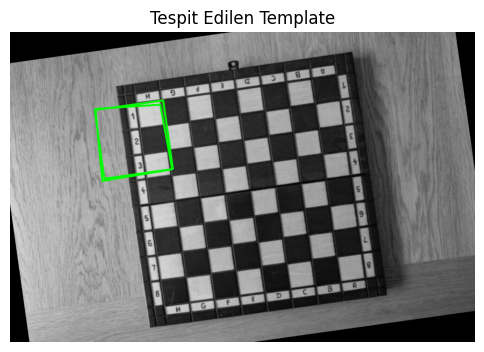

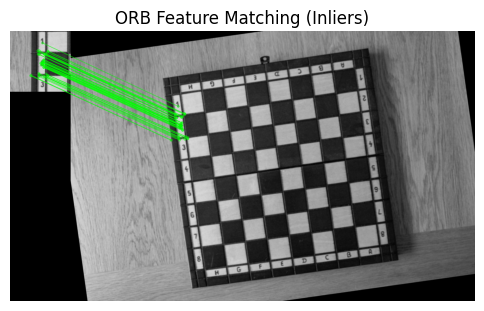

In [ ]:
if des_t is None or des_s is None:
    print("Yeterli ORB descriptor uretilemedi.")
else:
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    knn_matches = bf.knnMatch(des_t, des_s, k=2)

    # Lowe ratio test
    good = []
    for m, n in knn_matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    print(f"Toplam eslesme: {len(knn_matches)} | Iyi eslesme: {len(good)}")

    if len(good) >= 10:
        src_pts = np.float32([kp_t[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp_s[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        if H is not None:
            h_t, w_t = template_gray.shape
            corners = np.float32([[0, 0], [w_t - 1, 0], [w_t - 1, h_t - 1], [0, h_t - 1]]).reshape(-1, 1, 2)
            projected = cv2.perspectiveTransform(corners, H)
            cv2.polylines(scene_rot_bgr, [np.int32(projected)], True, (0, 255, 0), 3)

            # Inlier matchleri ciz
            selected_matches = good[:80]
            inlier_mask = mask.ravel().tolist() if mask is not None else None
            if inlier_mask is not None:
                inlier_mask = inlier_mask[:len(selected_matches)]

            img_match = cv2.drawMatches(
                template_gray, kp_t,
                scene_rot_gray, kp_s,
                selected_matches, None,
                matchColor=(0, 255, 0),
                singlePointColor=(255, 0, 0),
                matchesMask=inlier_mask,
                flags=2
            )

            show(cv2.cvtColor(scene_rot_bgr, cv2.COLOR_BGR2RGB), "Tespit Edilen Template")
            show(cv2.cvtColor(img_match, cv2.COLOR_BGR2RGB), "ORB Feature Matching (Inliers)")
        else:
            print("Homography hesaplanamadi.")
    else:
        print("Iyi eslesme sayisi dusuk, template bulunamadi.")


| Özellik  | ORB       | SIFT       |
| -------- | --------- | ---------- |
| Hız      | Çok hızlı | Daha yavaş |
| Doğruluk | Orta      | Yüksek     |
| Rotation | Orta      | Çok iyi    |
| Scale    | Zayıf     | Çok iyi    |
| Gürültü  | Hassas    | Dayanıklı  |


### HOG (Histogram of Oriented Gradients)

Artık nesnenin şekline, duruşuna ve silüetine odaklanan, bir dönemin efsanesi HOG (Histogram of Oriented Gradients) algoritmasına bakıyoruz.

2005 yılında Navneet Dalal ve Bill Triggs tarafından tanıtılan HOG, özellikle yaya tespiti (pedestrian detection) konusunda bir devrim yaratmıştır. Eğer bugün otonom araçlar bir insanın formunu hızlıca tanıyabiliyorsa, bunun temelinde HOG'un attığı adımlar vardır.

HOG'un temel felsefesi şudur: **"Bir nesnenin görünümü ve şekli, yerel yoğunluk değişimlerinin (gradyanların) yön dağılımı ile çok iyi tanımlanabilir."**

1. Gradyan Hesaplama 

(Yön ve Şiddet)Görüntüdeki her bir piksel için $x$ ve $y$ yönündeki değişimlere bakılır.
* Gradyan Şiddeti: Renk geçişi ne kadar sert?
* Gradyan Yönü: Bu geçiş hangi yöne doğru (yukarı mı, çapraz mı)?

Bu aşama, görüntüyü bir "oklar matrisine" dönüştürür. Okların boyu şiddeti, ucu ise yönü gösterir.

2. Hücrelere Bölme (Cells)

Görüntü genellikle 8x8 piksellik küçük hücrelere bölünür. Her hücre içindeki tüm piksellerin gradyan yönleri bir araya getirilir ve bir histogram oluşturulur.

* Örneğin: 0° ile 180° arası 9 kutucuğa (bin) bölünür. Eğer bir hücrede çoğunlukla dikey çizgiler varsa, 90° kutucuğunun değeri yükselir.
* Neden 8x8? Çünkü pikseller çok hassastır; hücrelere bölmek bizi ufak tefek gürültülerden kurtarır ve nesnenin "ana hatlarını" ortaya çıkarır.

3. Blok Normalizasyonu (Blocks)

Işık her zaman her yerde aynı değildir. Bir insan gölgede de olabilir, güneş altında da. HOG, bu ışık değişimlerinden etkilenmemek için hücreleri daha büyük gruplar (örneğin 16x16 piksellik bloklar) halinde toplar ve değerleri normalize eder. Bu, kontrast farklılıklarına karşı bir bağışıklık kazandırır.

4. Özellik Vektörü (The Feature Vector)

Tüm bu bloklardan gelen veriler tek bir uzun liste (vektör) haline getirilir. İşte bu liste, nesnenin "matematiksel parmak izidir."

**HOG**

* Şekil Odaklıdır: Renkler değişse bile (örneğin bir insanın kıyafeti ne renk olursa olsun) vücut hatları yani gradyan yönleri benzer kalır.
* Geometrik Hassasiyet: Nesne biraz dönse veya kaysa bile, hücre bazlı yapı sayesinde HOG hala onu tanıyabilir.
* İnsan Formu: HOG, özellikle dik duran insan silüetlerini yakalamakta o kadar başarılıdır ki, klasik makine öğrenmesi algoritmaları (SVM gibi) ile birleştiğinde mükemmel bir yaya dedektörüne dönüşür.

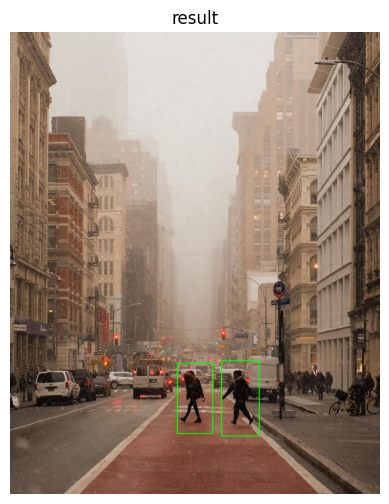

In [15]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) # SVM (Support Vector Machine)
# kendi eğittiğiniz detector ile arabaları yakalayacak bir algoritma da geliştirilebilir

rects, weights = hog.detectMultiScale(road_rgb,
                                      winStride=(4,4),
                                      padding=(8,8),
                                      scale=1.25)
for (x,y,w,h) in rects:
    cv2.rectangle(road_rgb, (x,y), (x+w, y+h), (0,255,0), 2)


show(road_rgb, title="result")

## 3. Klasik Object Detection (Haar Cascades)

Döneminin işlemcileriyle bile gerçek zamanlı yüz tespiti yapabilen ilk yöntemdi.

Algoritma, görüntünün tamamına bakmak yerine, "Haar-like" adı verilen küçük dikdörtgen pencereler kullanır. Bu pencereler iki veya üç bitişik dikdörtgenden oluşur (genellikle siyah ve beyaz).

Beyaz bölgedeki piksellerin toplamı ile siyah bölgedeki piksellerin toplamı arasındaki farka bakılır. Çünkü insan yüzünde bazı evrensel sabitler vardır. Örneğin, göz bölgesi her zaman yanaklardan daha karanlıktır. Ya da burun kemiği, her iki yanındaki çukurlardan daha aydınlıktır.

Haar filtreleri bu karanlık-aydınlık farklarını yakalayarak "Burada bir burun olabilir" veya "Burada bir göz olabilir" der.

"Cascade" ismi, algoritmanın çalışma şeklinden gelir. Görüntü üzerine gelen bir pencere, bir dizi testten (stage) geçer.
* Stage 1: Çok basit bir teste tabi tutulur. Eğer "burada yüz olma ihtimali %0" ise pencere hemen reddedilir.
* Stage 2: Bir önceki testi geçenler biraz daha karmaşık bir teste girer.
* ...ve bu böyle devam eder.

İşlemci gücü sadece "yüz olma ihtimali yüksek" olan bölgelere harcanır. Bu bir şelale (cascade) gibidir; sadece en güçlü adaylar sona ulaşır.

In [67]:
wizard = cv2.imread("./img/harry-potter.jpeg") 
wizard_gray = cv2.cvtColor(wizard, cv2.COLOR_BGR2GRAY)
wizard_rgb = cv2.cvtColor(wizard, cv2.COLOR_BGR2RGB)
wizard_gray = cv2.GaussianBlur(wizard_gray, (5,5), 0)

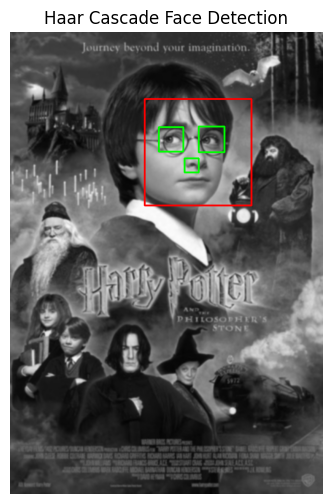

In [68]:

# Haar Cascade yükleme (OpenCV ile gelen xml dosyaları gereklidir)
# Genellikle cv2.data.haarcascades yolunda bulunur
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Yüz tespiti
img_face = cv2.cvtColor(wizard_gray, cv2.COLOR_GRAY2BGR) # Çizim için
faces = face_cascade.detectMultiScale(wizard_gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img_face, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = wizard_gray[y:y+h, x:x+w]
    roi_color = img_face[y:y+h, x:x+w]
    
    # Göz tespiti (yüz alanı içinde)
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

show(img_face, "Haar Cascade Face Detection")


Haar Cascade, doğrudan karşıya bakan yüzlerde harikadır. Ancak yüzünüzü 45 derece yana eğerseniz veya profilden bakarsanız genellikle çuvallar.

Bazen karmaşık bir duvar desenini veya bir ağaç yaprağını "yüz" sanabilir.

Kendi Haar Cascade modelini eğitmek haftalar sürebilir. Neyse ki OpenCV bize haarcascade_frontalface_default.xml gibi önceden eğitilmiş, hazır dosyalar sunar.

Haar Cascade sadece yüz bulmak için değildir. El, göz, gülümseme, hatta araç plakası bulmak için bile eğitilebilir. Ancak bugünlerde yerini büyük oranda Deep Learning (CNN) temelli yöntemlere bıraktı. Yine de hızın kritik olduğu, düşük işlemci kapasiteli (Edge cihazlar, basit mikrodenetleyiciler) yerlerde hala bir "efsane" olarak kullanılır.

## 4. CNN (Bilgisayarlı Görünün Derin Öğrenmesi)

ANN örneği : https://www.kaggle.com/code/ayenurtak/fish-images-classification-with-ann

![DL.jpg](./img/DL.jpg)

**Her DNN bir ANN'dir, ancak her ANN bir DNN değildir.**

1. **ANN (Artificial Neural Networks - Yapay Sinir Ağları)**

ANN, insan beynindeki nöronların çalışma prensibini taklit eden en genel şemsiye terimdir. Bir ANN şu üç temel yapıdan oluşur:

**Giriş Katmanı (Input Layer):** Veriyi (örneğin bir resmin piksellerini) alır.

**Gizli Katman (Hidden Layer):** Veriyi işleyen, ağırlıkların hesaplandığı katman.

**Çıkış Katmanı (Output Layer):** Sonucu (örneğin "Bu bir kedi") verir.

Eğer bir sinir ağında sadece bir veya iki adet gizli katman varsa, buna genellikle "Sığ Sinir Ağı" (Shallow Neural Network) veya basitçe ANN denir.

2. **DNN (Deep Neural Networks - Derin Sinir Ağları)**

DNN, "Deep" (Derin) kelimesinden de anlaşılacağı üzere, ANN'nin daha çok gizli katmana sahip olan versiyonudur.

Derinlik Farkı: Bir sinir ağında gizli katman sayısı arttıkça (genellikle 2-3 katmandan fazlası), ağ "derinleşir".

Neden Derinleşiyoruz? Katman sayısı arttıkça ağ, verideki daha karmaşık yapıları öğrenebilir.

* İlk katmanlar sadece kenarları görürken,
* Orta katmanlar şekilleri,
* Derin katmanlar ise nesnenin tamamını (yüz, araba vb.) anlar

![cnn.png](./img/cnn.png)

CNN (Convolutional Neural Networks), yani Evrişimli Sinir Ağları, dijital görüntüleri anlamak için tasarlanmış özel bir derin öğrenme mimarisidir.

Klasik sinir ağları bir görüntüyü "düzleştirip" (flatten) tüm pikselleri birer sayı olarak işlerken, CNN görüntünün mekansal (spatial) yapısını, yani hangi pikselin hangisinin yanında olduğu bilgisini korur.

- Derinlik
- Input
- Nöron
- Hidden Layers
- Aktivasyon Fonksionları
- Forward Pass
- Loss Fonksiyonları
- Backpropagation
- Optimizer
- Parametreler ve Hiperparametreler
- Model Değerlendirmesi

1. Convolution (Evrişim) Katmanı

CNN'in kalbidir. Görüntünün üzerinden küçük bir pencere (filtre/kernel) kaydırılarak, görüntüdeki özellikler (kenarlar, dokular) yakalanır.

**Kernel/Filter**: Genellikle 3x3 veya 5x5 boyutunda olan, sayı dolu bir karedir. Görüntü üzerinde gezerken "özellik haritaları" (feature maps) oluşturur.

**Stride (Adım)**: Filtrenin görüntü üzerinde her seferinde kaç piksel atlayacağını belirler. 1 adım yavaş ama detaylıdır, 2 adım görüntüyü küçültür.

**Padding (Dolgulama)**: Filtreleme sırasında kenardaki pikseller daha az işlendiği için görüntünün dışına sıfırlardan oluşan bir "çerçeve" eklenmesidir. Bu, görüntü boyutunun korunmasını sağlar.

In [ ]:
# kernel = np.array([
#     [-1, -1, -1],
#     [-1,  8, -1],
#     [-1, -1, -1]
# ])

# edges = cv2.filter2D(grayscale, -1, kernel)

2. Aktivasyon Fonksiyonu (Genellikle ReLU)

Evrişim işleminden sonra gelen "karar verici"dir.

Aktivasyon fonksiyonları, biyolojik nöronlardaki "hep ya da hiç" kuralını taklit eder. Bir nörona gelen bilgi yeterince güçlü mü? Bu bilgi bir sonraki katmana iletilmeli mi?

Fonksiyon, gelen veriyi belirli bir eşikten geçirir.

Eğer gelen sinyal önemsizse (örneğin arka plandaki anlamsız bir gürültü), fonksiyon onu sıfıra yaklaştırarak "susturur".

Eğer sinyal önemliyse (örneğin bir yüzün kenar çizgisi), fonksiyon onu "ateşler" ve bir sonraki katmana aktarır.

**ReLU** (Rectified Linear Unit): Negatif değerleri sıfıra çevirir, pozitif değerleri olduğu gibi bırakır. Bu, ağın karmaşık (doğrusal olmayan) desenleri öğrenmesini sağlar ve hesaplama hızını artırır.

3. Pooling (Havuzlama) Katmanı

Görüntünün boyutunu (çözünürlüğünü) azaltma işlemidir. Bilgisayarın "ayrıntıları boşver, ana fikri al" dediği yerdir.

**Max Pooling**: Belirlenen bir bölgedeki (örneğin 2x2) en büyük değeri seçer. Bu, nesnenin görüntüdeki konumundan bağımsız olarak tanınmasını (spatial invariance) sağlar ve sistemi gürültüye karşı dayanıklı kılar.

4. Flattening (Düzleştirme)

Evrişim ve havuzlama katmanlarından geçen 2 boyutlu (kare) veriler, klasik bir sinir ağına girebilmesi için tek bir sütun (vektör) haline getirilir. Bir nevi "matrisi listeye çevirme" işlemidir.

5. Fully Connected (Tam Bağlantılı) Katman

Burada işin içine klasik ANN girer. Düzleştirilmiş veriler, her nöronun birbirine bağlı olduğu katmanlardan geçer. Ağ artık "bulduğum bu kenarlar ve şekiller birleşince bir araba mı oluşturuyor yoksa bir uçak mı?" kararını burada verir.

6. Softmax / Sigmoid (Çıkış Katmanı)

Sınıflandırma sonucunun belirlendiği yerdir.

**Softmax**: Nesnenin hangi sınıfa ait olduğuna dair olasılıklar üretir (Örn: %80 Kedi, %15 Köpek, %5 Kuş).

Alt Seviye: İlk katmanlar basit yatay ve dikey çizgileri bulur.

Orta Seviye: Bu çizgileri birleştirip köşeleri, daireleri veya dokuları yakalar.

Üst Seviye: Bu şekilleri birleştirip göz, tekerlek, kapı kolu gibi karmaşık parçaları tanır.

Sonuç: Tüm parçaları birleştirip "Bu bir kedidir" der.

[dataset-açıklaması](https://www.tensorflow.org/datasets/catalog/mnist?hl=tr)

In [27]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# print("TensorFlow version:", tf.__version__)

In [28]:

# # Dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Float32 + Normalize
# x_train = x_train.astype("float32") / 255.0
# x_test  = x_test.astype("float32") / 255.0

# # Channel dimension ekle
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test  = x_test.reshape(-1, 28, 28, 1)


In [29]:
# # Model
# model = models.Sequential([
#     layers.Input(shape=(28, 28, 1)),

#     layers.Conv2D(16, (3,3), activation="relu"),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(32, (3,3), activation="relu"),
#     layers.MaxPooling2D((2,2)),

#     layers.Flatten(),

#     layers.Dense(64, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

In [30]:
# # Compile
# model.compile(
#     optimizer="adam", # hatalarım nöronların değerlerini nasıl değiştirecek
#     loss="sparse_categorical_crossentropy", # ne kadar hata yaptım
#     metrics=["accuracy"]
# )


# model.summary()

In [31]:
# # Train
# history = model.fit(
#     x_train,
#     y_train,
#     epochs=5,
#     batch_size=64,
#     validation_split=0.1,
#     shuffle=True
# )

In [32]:
# # Test
# test_loss, test_acc = model.evaluate(x_test, y_test)

In [33]:
# print("Test accuracy:", test_acc)

### Augmentation

In [46]:
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.03),      # ~10 derece
#     layers.RandomBrightness(0.2)
# ])


## 5. Deep Learning ve YOLO ile Nesne Tespiti (You Look Only Once)


Eğer bugün otonom araçlar yoldaki yayaları anlık olarak fark edebiliyorsa veya güvenlik kameraları onlarca nesneyi aynı anda takip edebiliyorsa, bunu büyük oranda YOLO'ya borçluyuz.

YOLO'dan önce (R-CNN gibi modellerde), bir görüntüyü analiz etmek için önce "Burada bir şeyler olabilir mi?" diye binlerce bölge önerisi (region proposals) oluşturulur, sonra her bölge tek tek sınıflandırılırdı. Bu, aynı resme yüzlerce kez bakmak gibiydi ve çok yavaştı.

YOLO ise adından da anlaşılacağı üzere: Sadece Bir Kez Bakar. Görüntüyü bir uçtan bir uca tek bir sinir ağından (CNN) geçirir ve aynı anda hem nesnelerin yerini (bounding box) hem de ne olduklarını (class) tahmin eder.

**Avantajları:**

Bir kere çok hızlı bir model.

Diğer yöntemler sadece küçük bölgelere odaklanırken, YOLO tüm resme bakar. Bu sayede arka plandaki nesneleri karıştırma (örneğin bir duvar resmini gerçek bir nesne sanma) oranı çok daha düşüktür. Yani global context'de daha iyi.

Doğal fotoğraflarla eğitilen bir YOLO, sanat eserlerindeki veya çizimlerdeki nesneleri tanıma konusunda diğer modellerden daha başarılıdır. Dolayısıyla genellenebilirliği yüksek.

**Dezavantajları:**

Küçük Nesne Problemi: Izgara mantığı nedeniyle, birbirine çok yakın ve çok küçük nesneleri (örneğin gökyüzündeki bir kuş sürüsü) tespit etmekte zorlanabilir. Her hücre sınırlı sayıda kutu tahmin edebilir.

Hassasiyet (Localization Error): Nesnenin yerini belirleme konusunda (bounding box'ın tam oturması), yavaş ama titiz olan R-CNN türevleri kadar milimetrik sonuçlar veremeyebilir.

Bu bölümde `cv2.dnn` modülü kullanılarak pre-trained modeller yüklenir. Çalışması için `yolov3.weights`, `yolov3.cfg` ve `coco.names` dosyalarına ihtiyacınız vardır.

En son 2025'de YOLOv12 çıktı.

In [34]:
net = cv2.dnn.readNet("./yolo-source/yolov3.weights", "./yolo-source/yolov3.cfg")
classes = []
with open("./yolo-source/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [35]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [36]:
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [37]:
# Resmi Blob formatına çevirme
blob = cv2.dnn.blobFromImage(road_rgb, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

In [38]:
net.setInput(blob)
outs = net.forward(output_layers)

In [39]:
print(len(outs))
print(outs[0].shape)


3
(507, 85)


In [40]:
boxes, confidences, class_ids = [], [], []
threshold = 0.5

In [41]:
h, w, _ = road_rgb.shape

In [42]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = int(np.argmax(scores))
        confidence = float(scores[class_id])

        if confidence > threshold:
            center_x = int(detection[0] * w)
            center_y = int(detection[1] * h)
            bw = int(detection[2] * w)
            bh = int(detection[3] * h)

            x = int(center_x - bw / 2)
            y = int(center_y - bh / 2)

            boxes.append([x, y, bw, bh])
            confidences.append(confidence)
            class_ids.append(class_id)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [43]:
indices

array([ 8,  5, 13, 14, 20, 16, 19, 17, 11, 10, 18,  0, 15, 12,  9],
      dtype=int32)

In [44]:
result = road_rgb.copy()

if len(indices) > 0:
    for i in indices.flatten():
        x, y, bw, bh = boxes[i]
        label = classes[class_ids[i]]
        conf = confidences[i]

        cv2.rectangle(result, (x, y), (x + bw, y + bh), (0, 255, 0), 2)
        cv2.putText(
            result,
            f"{label} {conf:.2f}",
            (x, max(20, y - 8)),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (255, 0, 0),
            2,
        )

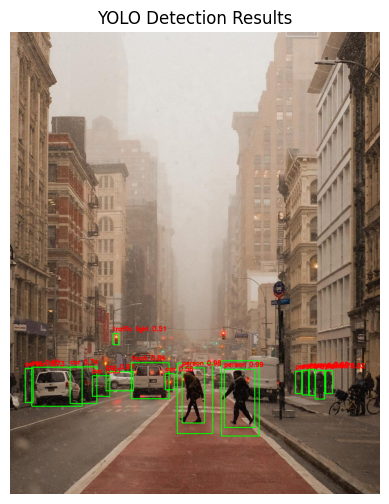

In [45]:
show(result, "YOLO Detection Results")


## 6. Gelecek Perspektifi
Bundan sonraki adımlarda derin öğrenme mimarilerine odaklanabilirsiniz:
* **CNN Derinleşmesi:** ResNet, EfficientNet vb.
* **Transformers:** Vision Transformers (ViT)
* **Generative Models:** GANs ve Diffusion modelleri


- Geç 2000ler and 2010lar CNN Era olarak adlandırılır, bu tarihlerde sadece katmanları üst üste koymuyoruz; ResNet ile verinin derinlerde kaybolmasını engelliyor, EfficientNet ile mobil cihazlarda bile canavar gibi çalışan modeller tasarlıyoruz.

    - **LeNet‑5** → http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf
    - **AlexNet**  → https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf
    - **VGGNet** → https://arxiv.org/abs/1409.1556
    - **GoogleLeNet / Inception** → https://arxiv.org/abs/1409.4842
    - **ResNet** → https://arxiv.org/abs/1512.03385
    - **EfficientNet** → https://arxiv.org/abs/1905.11946

- 2010’dan sonra transfer learning teknikleri ile bilgisayarlı görü daha da gelişti.
    - **GANs** → https://arxiv.org/abs/1406.2661
    - Attention mekanizmaları ve transformerler da ayrıca bilgisayarlı görüye uygulandı
        - **ViT** → https://arxiv.org/abs/1406.2661

Eskiden "Attention is All You Need" sadece metinler (NLP) içindi. Artık değil! ViT (Vision Transformer) modelleri, görüntüyü küçük parçalara bölüp birbirleriyle olan ilişkisini analiz ederek, bazı görevlerde CNN'leri bile geride bırakmaya başladı.

GAN (Generative Adversarial Networks) modelleri Sadece görmüyoruz, artık üretiyoruz da. İki sinir ağının birbiriyle yarıştığı (biri sahte üretir, diğeri yakalamaya çalışır) bu yapılarla, gerçekte var olmayan yüzler veya sanatsal tablolar oluşturabilirsiniz.

**CNN VS Transformer**

| Kriter | CNN | Transformer | 
| --- | --- | --- | 
| Veri ihtiyacı | Düşük-Orta | Yüksek | 
| Yerel özellik | Çok güçlü | Dolaylı | 
| Global bağlam | Sınırlı | Çok güçlü | 
| Hesaplama maliyeti | Düşük | Yüksek | 
| Küçük dataset | Başarılı | Zor | 
| Büyük dataset | İyi | Çok iyi | 
| Edge cihaz | Uygun | Zor | 
| Esneklik | Orta | Yüksek | 

**Object Detection için özel olarak,**

2014 **R-CNN** → https://arxiv.org/pdf/1311.2524 

2015 **Fast R-CNN** → https://arxiv.org/abs/1504.08083

2015 **Faster R-CNN** → https://proceedings.neurips.cc/paper_files/paper/2015/file/14bfa6bb14875e45bba028a21ed38046-Paper.pdf 

2015 **YOLO** → https://arxiv.org/abs/1506.02640

Multimodal Era,

**CLIP, GPT-4o**

Artık sadece görüntüyü görmüyoruz; görüntüyle konuşuyoruz. "Bu resimdeki komik olan şey ne?" diye sorduğunuzda hem dili hem görseli aynı anda işleyen bu modeller, bilgisayarlı görünün en sıcak çalışma alanı.